# Analyzing Customer Trends and Insights for Diabetes Products Company

## Fetch Data from API and Insert into MongoDB

In [1]:
import requests
from pymongo import MongoClient

# MongoDB connection
client = MongoClient('mongodb://localhost:27017/')
db = client['air_quality']
collection = db['customers']

# API URL
url = 'http://127.0.0.1:5000/data'

# Fetch and insert data into MongoDB
def fetch_and_store(api_url, batch_size=100):
    page = 1
    while True:
        response = requests.get(api_url, params={'page': page, 'per_page': batch_size})
        if response.status_code != 200:
            print("No more data to fetch or error occurred.")
            break
        
        data = response.json()
        collection.insert_many(data)
        print(f"Inserted page {page} into MongoDB.")
        page += 1

# Run the function
fetch_and_store(url)


Inserted page 1 into MongoDB.
Inserted page 2 into MongoDB.
Inserted page 3 into MongoDB.
Inserted page 4 into MongoDB.
Inserted page 5 into MongoDB.
Inserted page 6 into MongoDB.
Inserted page 7 into MongoDB.
Inserted page 8 into MongoDB.
Inserted page 9 into MongoDB.
Inserted page 10 into MongoDB.
Inserted page 11 into MongoDB.
Inserted page 12 into MongoDB.
Inserted page 13 into MongoDB.
Inserted page 14 into MongoDB.
Inserted page 15 into MongoDB.
Inserted page 16 into MongoDB.
Inserted page 17 into MongoDB.
Inserted page 18 into MongoDB.
Inserted page 19 into MongoDB.
Inserted page 20 into MongoDB.
Inserted page 21 into MongoDB.
Inserted page 22 into MongoDB.
Inserted page 23 into MongoDB.
Inserted page 24 into MongoDB.
Inserted page 25 into MongoDB.
Inserted page 26 into MongoDB.
Inserted page 27 into MongoDB.
Inserted page 28 into MongoDB.
Inserted page 29 into MongoDB.
Inserted page 30 into MongoDB.
Inserted page 31 into MongoDB.
Inserted page 32 into MongoDB.
Inserted page 33 

Inserted page 262 into MongoDB.
Inserted page 263 into MongoDB.
Inserted page 264 into MongoDB.
Inserted page 265 into MongoDB.
Inserted page 266 into MongoDB.
Inserted page 267 into MongoDB.
Inserted page 268 into MongoDB.
Inserted page 269 into MongoDB.
Inserted page 270 into MongoDB.
Inserted page 271 into MongoDB.
Inserted page 272 into MongoDB.
Inserted page 273 into MongoDB.
Inserted page 274 into MongoDB.
Inserted page 275 into MongoDB.
Inserted page 276 into MongoDB.
Inserted page 277 into MongoDB.
Inserted page 278 into MongoDB.
Inserted page 279 into MongoDB.
Inserted page 280 into MongoDB.
Inserted page 281 into MongoDB.
Inserted page 282 into MongoDB.
Inserted page 283 into MongoDB.
Inserted page 284 into MongoDB.
Inserted page 285 into MongoDB.
Inserted page 286 into MongoDB.
Inserted page 287 into MongoDB.
Inserted page 288 into MongoDB.
Inserted page 289 into MongoDB.
Inserted page 290 into MongoDB.
Inserted page 291 into MongoDB.
Inserted page 292 into MongoDB.
Inserted

Inserted page 539 into MongoDB.
Inserted page 540 into MongoDB.
Inserted page 541 into MongoDB.
Inserted page 542 into MongoDB.
Inserted page 543 into MongoDB.
Inserted page 544 into MongoDB.
Inserted page 545 into MongoDB.
Inserted page 546 into MongoDB.
Inserted page 547 into MongoDB.
Inserted page 548 into MongoDB.
Inserted page 549 into MongoDB.
Inserted page 550 into MongoDB.
Inserted page 551 into MongoDB.
Inserted page 552 into MongoDB.
Inserted page 553 into MongoDB.
Inserted page 554 into MongoDB.
Inserted page 555 into MongoDB.
Inserted page 556 into MongoDB.
Inserted page 557 into MongoDB.
Inserted page 558 into MongoDB.
Inserted page 559 into MongoDB.
Inserted page 560 into MongoDB.
Inserted page 561 into MongoDB.
Inserted page 562 into MongoDB.
Inserted page 563 into MongoDB.
Inserted page 564 into MongoDB.
Inserted page 565 into MongoDB.
Inserted page 566 into MongoDB.
Inserted page 567 into MongoDB.
Inserted page 568 into MongoDB.
Inserted page 569 into MongoDB.
Inserted

Inserted page 808 into MongoDB.
Inserted page 809 into MongoDB.
Inserted page 810 into MongoDB.
Inserted page 811 into MongoDB.
Inserted page 812 into MongoDB.
Inserted page 813 into MongoDB.
Inserted page 814 into MongoDB.
Inserted page 815 into MongoDB.
Inserted page 816 into MongoDB.
Inserted page 817 into MongoDB.
Inserted page 818 into MongoDB.
Inserted page 819 into MongoDB.
Inserted page 820 into MongoDB.
Inserted page 821 into MongoDB.
Inserted page 822 into MongoDB.
Inserted page 823 into MongoDB.
Inserted page 824 into MongoDB.
Inserted page 825 into MongoDB.
Inserted page 826 into MongoDB.
Inserted page 827 into MongoDB.
Inserted page 828 into MongoDB.
Inserted page 829 into MongoDB.
Inserted page 830 into MongoDB.
Inserted page 831 into MongoDB.
Inserted page 832 into MongoDB.
Inserted page 833 into MongoDB.
Inserted page 834 into MongoDB.
Inserted page 835 into MongoDB.
Inserted page 836 into MongoDB.
Inserted page 837 into MongoDB.
Inserted page 838 into MongoDB.
Inserted

# Bronze Layer

## Count Rows and Columns in MongoDB Collection

In [2]:
from pymongo import MongoClient

# MongoDB connection
client = MongoClient('mongodb://localhost:27017/')
db = client['air_quality']
collection = db['customers']

# Count number of rows
num_rows = collection.count_documents({})
print(f"Number of Rows: {num_rows}")

# Retrieve one document to infer the number of fields (columns)
sample_doc = collection.find_one()
num_columns = len(sample_doc.keys()) if sample_doc else 0
print(f"Number of Columns: {num_columns}")


Number of Rows: 200000
Number of Columns: 13


## Remove Duplicate Records from MongoDB Collection

In [3]:
# Find duplicates and remove them
pipeline = [
    {"$group": {
        "_id": {"CustomerId": "$Customer Id"},
        "count": {"$sum": 1},
        "docs": {"$push": "$_id"}
    }},
    {"$match": {"count": {"$gt": 1}}}
]

duplicates = [doc["docs"][1:] for doc in collection.aggregate(pipeline)]
duplicate_ids = [item for sublist in duplicates for item in sublist]

# Delete duplicates
if duplicate_ids:
    collection.delete_many({"_id": {"$in": duplicate_ids}})
print("Duplicates removed.")


Duplicates removed.


## Handle Missing Values in MongoDB Fields

In [4]:
# Fill missing 'City' with 'Unknown'
collection.update_many({"City": {"$exists": False}}, {"$set": {"City": "Unknown"}})

# Fill missing 'Country' with 'Not Specified'
collection.update_many({"Country": {"$exists": False}}, {"$set": {"Country": "Not Specified"}})

print("Null values handled.")


Null values handled.


## Standardize Data Formats in MongoDB Collection

In [5]:
cursor = collection.find({}, {"_id": 1, "City": 1, "Email": 1})
for doc in cursor:
    updates = {}
    if "City" in doc:
        updates["City"] = doc["City"].title()
    if "Email" in doc:
        updates["Email"] = doc["Email"].lower()
    
    if updates:
        collection.update_one({"_id": doc["_id"]}, {"$set": updates})
print("Data formats standardized.")


Data formats standardized.


# Silver Layer and Data Cleaning

## Load CSV File into Pandas DataFrame

In [6]:
import pandas as pd

# Use forward slashes
file_path = "C:/Users/HP/Downloads/Untitled Folder/customers-100000.csv"
data = pd.read_csv(file_path)

## Remove Duplicates Based on 'Customer Id'

In [7]:
# Drop duplicates based on 'Customer Id'
data = data.drop_duplicates(subset='Customer Id')
print("Duplicates removed.")


Duplicates removed.


## Handle Missing Values in DataFrame

In [8]:
# Fill missing values for 'City' and 'Country'
data['City'] = data['City'].fillna('Unknown')
data['Country'] = data['Country'].fillna('Not Specified')

print("Missing values handled.")


Missing values handled.


## Standardize 'City' and 'Email' Formats in DataFrame

In [9]:
# Convert 'City' names to title case
data['City'] = data['City'].str.title()

# Convert email addresses to lowercase
data['Email'] = data['Email'].str.lower()

print("Data formats standardized.")


Data formats standardized.


## Save Cleaned Data to CSV File

In [10]:
# Save the cleaned data to a new file
cleaned_file_path = 'customers_cleaned.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}.")


Cleaned data saved to customers_cleaned.csv.


# Gold Layer

## Aggregate and Count Customers by Country

In [11]:
# Aggregation pipeline to count customers by country
pipeline = [
    {"$group": {"_id": "$Country", "customer_count": {"$sum": 1}}},
    {"$sort": {"customer_count": -1}}
]

result = collection.aggregate(pipeline)
for doc in result:
    print(doc)


{'_id': 'Congo', 'customer_count': 835}
{'_id': 'Korea', 'customer_count': 820}
{'_id': 'Saudi Arabia', 'customer_count': 463}
{'_id': 'Pitcairn Islands', 'customer_count': 456}
{'_id': 'Saint Martin', 'customer_count': 453}
{'_id': 'Paraguay', 'customer_count': 445}
{'_id': 'Canada', 'customer_count': 444}
{'_id': 'Saint Kitts and Nevis', 'customer_count': 443}
{'_id': 'American Samoa', 'customer_count': 443}
{'_id': 'Cook Islands', 'customer_count': 441}
{'_id': 'Mauritania', 'customer_count': 441}
{'_id': 'Heard Island and McDonald Islands', 'customer_count': 440}
{'_id': 'Namibia', 'customer_count': 439}
{'_id': 'Montenegro', 'customer_count': 439}
{'_id': 'Bolivia', 'customer_count': 438}
{'_id': 'Kenya', 'customer_count': 438}
{'_id': 'Guyana', 'customer_count': 438}
{'_id': 'Guam', 'customer_count': 438}
{'_id': 'Luxembourg', 'customer_count': 438}
{'_id': 'United States Minor Outlying Islands', 'customer_count': 438}
{'_id': 'Papua New Guinea', 'customer_count': 436}
{'_id': 'A

## Aggregate and Count Customers by City Within Each Country

In [12]:
# Aggregation pipeline to count customers by city within each country
pipeline = [
    {"$group": {"_id": {"Country": "$Country", "City": "$City"}, "customer_count": {"$sum": 1}}},
    {"$sort": {"_id.Country": 1, "customer_count": -1}}
]

result = collection.aggregate(pipeline)
for doc in result:
    print(doc)


{'_id': {'Country': 'Afghanistan', 'City': 'Riverstown'}, 'customer_count': 2}
{'_id': {'Country': 'Afghanistan', 'City': 'Odonnelltown'}, 'customer_count': 1}
{'_id': {'Country': 'Afghanistan', 'City': 'Lake Amber'}, 'customer_count': 1}
{'_id': {'Country': 'Afghanistan', 'City': 'Jacobsonland'}, 'customer_count': 1}
{'_id': {'Country': 'Afghanistan', 'City': 'East Heather'}, 'customer_count': 1}
{'_id': {'Country': 'Afghanistan', 'City': 'Donnachester'}, 'customer_count': 1}
{'_id': {'Country': 'Afghanistan', 'City': 'East Larry'}, 'customer_count': 1}
{'_id': {'Country': 'Afghanistan', 'City': 'Esparzahaven'}, 'customer_count': 1}
{'_id': {'Country': 'Afghanistan', 'City': 'Carlmouth'}, 'customer_count': 1}
{'_id': {'Country': 'Afghanistan', 'City': 'Port Jorge'}, 'customer_count': 1}
{'_id': {'Country': 'Afghanistan', 'City': 'Annettemouth'}, 'customer_count': 1}
{'_id': {'Country': 'Afghanistan', 'City': 'New Colleenstad'}, 'customer_count': 1}
{'_id': {'Country': 'Afghanistan', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Find Top 5 Companies by Number of Customers

In [13]:
# Aggregation pipeline to find the top 5 companies by number of customers
pipeline = [
    {"$group": {"_id": "$Company", "customer_count": {"$sum": 1}}},
    {"$sort": {"customer_count": -1}},
    {"$limit": 5}
]

result = collection.aggregate(pipeline)
for doc in result:
    print(doc)


{'_id': 'Wilkerson Ltd', 'customer_count': 17}
{'_id': 'Campbell Ltd', 'customer_count': 17}
{'_id': 'Acosta Ltd', 'customer_count': 16}
{'_id': 'Booker and Sons', 'customer_count': 16}
{'_id': 'Mckenzie PLC', 'customer_count': 15}


## Load Cleaned CSV Data into DataFrame

In [14]:
import pandas as pd

# Load cleaned data
file_path = 'customers_cleaned.csv'
data = pd.read_csv(file_path)


## Group and Count Customers by Country

In [15]:
# Group by 'Country' and count customers
agg_country = data.groupby('Country').size().reset_index(name='customer_count')
agg_country = agg_country.sort_values(by='customer_count', ascending=False)
print(agg_country)


              Country  customer_count
49              Congo             835
114             Korea             820
191      Saudi Arabia             463
172  Pitcairn Islands             456
185      Saint Martin             453
..                ...             ...
141           Moldova             371
110            Jordan             365
184       Saint Lucia             365
198          Slovenia             361
82             Greece             359

[243 rows x 2 columns]


## Group and Count Customers by Country and City

In [16]:
# Group by 'Country' and 'City', and count customers
agg_city = data.groupby(['Country', 'City']).size().reset_index(name='customer_count')
agg_city = agg_city.sort_values(by=['Country', 'customer_count'], ascending=[True, False])
print(agg_city)


           Country               City  customer_count
314    Afghanistan         Riverstown               2
0      Afghanistan       Adrianamouth               1
1      Afghanistan        Alecborough               1
2      Afghanistan     Alejandraville               1
3      Afghanistan          Allenport               1
...            ...                ...             ...
99483     Zimbabwe      West Michelle               1
99485     Zimbabwe  West Suzannehaven               1
99486     Zimbabwe        Whitneyfort               1
99487     Zimbabwe          Wyattfort               1
99488     Zimbabwe      Zavalachester               1

[99489 rows x 3 columns]


## Group and Count Customers by Company

In [17]:
# Group by 'Company' and count customers
agg_company = data.groupby('Company').size().reset_index(name='customer_count')
agg_company = agg_company.sort_values(by='customer_count', ascending=False).head(10)
print(agg_company)


                Company  customer_count
9844       Campbell Ltd              17
69850     Wilkerson Ltd              17
6314    Booker and Sons              16
152          Acosta Ltd              16
41993  Mccarty and Sons              15
25894     Gregory Group              15
43318      Mckenzie PLC              15
28179  Hartman and Sons              14
24399     Gillespie LLC              14
19084       Ellison Inc              14


## Save Aggregated Datasets to CSV Files

In [18]:
# Save aggregated datasets to CSV
agg_country.to_csv('agg_country.csv', index=False)
agg_city.to_csv('agg_city.csv', index=False)
agg_company.to_csv('agg_company.csv', index=False)
print("Aggregated datasets saved.")


Aggregated datasets saved.


# Data Visualization

## Visualize Customer Distribution by Country

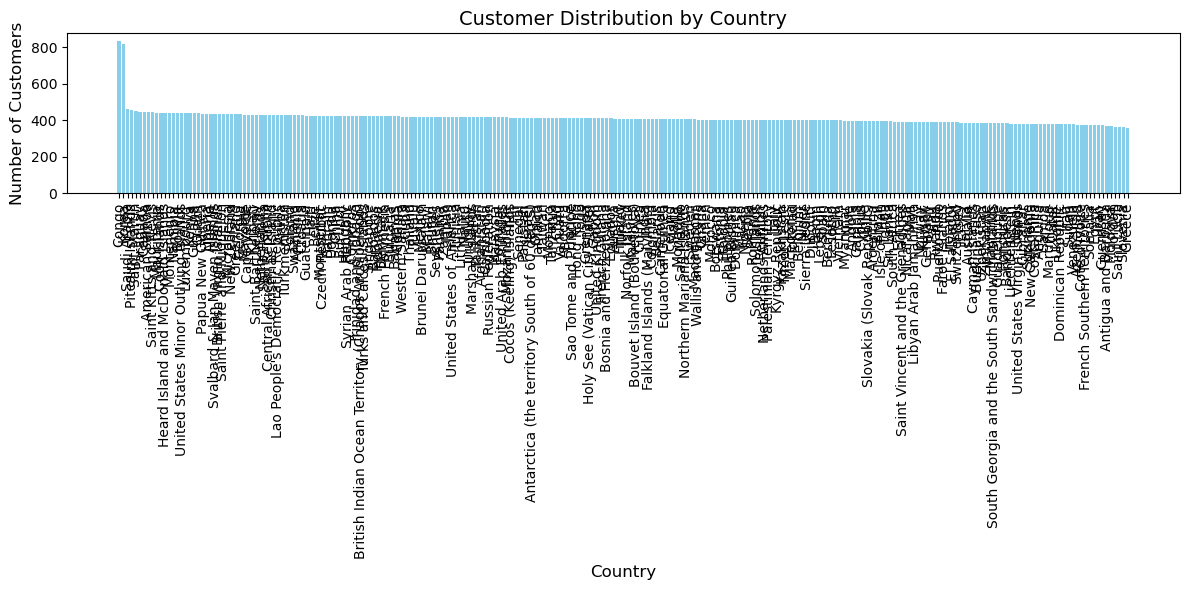

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Load aggregated country dataset
agg_country = pd.read_csv('agg_country.csv')

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(agg_country['Country'], agg_country['customer_count'], color='skyblue')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Customer Distribution by Country', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Visualize Top 10 Countries by Customer Distribution

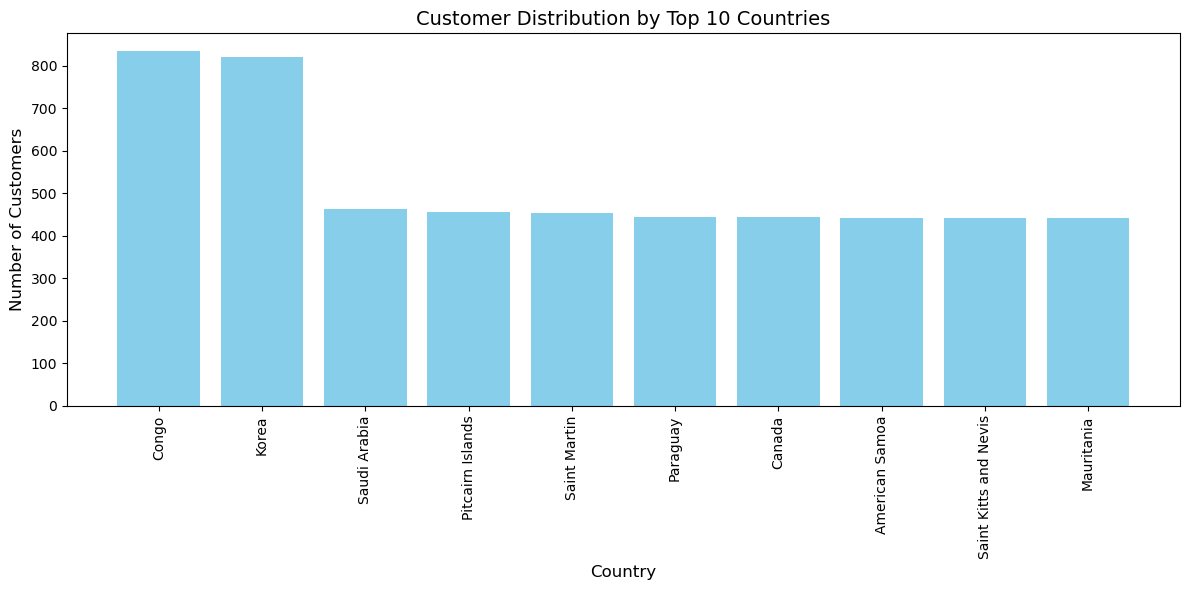

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Load aggregated country dataset
agg_country = pd.read_csv('agg_country.csv')

# Sort the dataset by customer_count in descending order and select the top 10 countries
top_10_countries = agg_country.sort_values(by='customer_count', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['Country'], top_10_countries['customer_count'], color='skyblue')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Customer Distribution by Top 10 Countries', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Visualize Top Companies by Customer Distribution

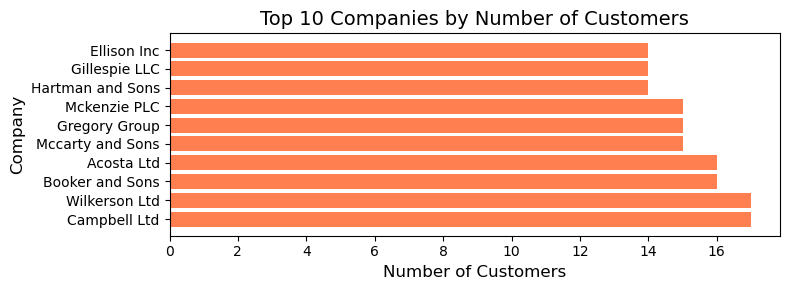

In [23]:
# Load aggregated company dataset
agg_company = pd.read_csv('agg_company.csv')

# Plot horizontal bar chart
plt.figure(figsize=(8, 3))
plt.barh(agg_company['Company'], agg_company['customer_count'], color='coral')
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.title('Top 10 Companies by Number of Customers', fontsize=14)
plt.tight_layout()
plt.show()


## Visualize Monthly Subscription Trends

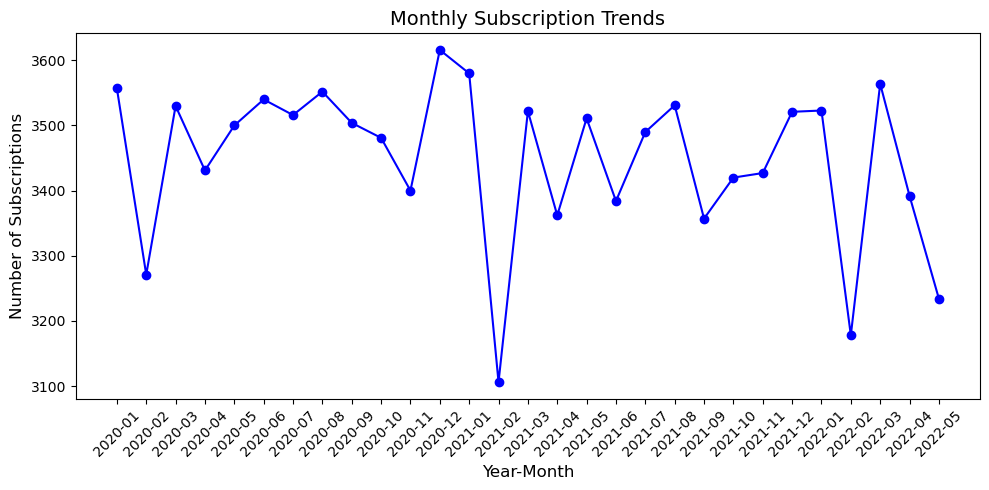

In [22]:
# Assuming a dataset with subscription dates parsed into 'Year-Month'
data = pd.read_csv('customers_cleaned.csv')
data['Subscription Date'] = pd.to_datetime(data['Subscription Date'])
data['Year-Month'] = data['Subscription Date'].dt.to_period('M')

# Aggregate by Year-Month
subscription_trends = data.groupby('Year-Month').size().reset_index(name='customer_count')

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(subscription_trends['Year-Month'].astype(str), subscription_trends['customer_count'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Subscriptions', fontsize=12)
plt.title('Monthly Subscription Trends', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
